# 3- Temel Bileşen Regresyonu / Principal Component Regression (PCR)

## TEORİ

**Temel amaç, değişkenlerin boyut indirgeme uyguladıktan sonra oluşan bileşenlere regresyon modeli kurulularak optimum hata değerini bulmaktır.**

PCR basitçe iki aşamadan oluşur,
1. Bağımlı değişken ile ilişkili olan bağımsız değişkenleri PCA yöntemiyle temel bileşenlere ayırılır,
2. Oluşturulan temel bileşenlere model kurularak optimum hata elde edilir.

! genelde verisetinin boyutu fazla olan veri üzerinde uygulanır ve değişkenler sürekli olmalıdır!

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Kullanılan Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

* Verisetinin İncelenmesi

Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/Hitters.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/Hitters.csv"

hit = pd.read_csv(url)
df = hit.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.info() # veriseti hakkında bilgi verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
df.isnull().values.any() # verisetinde bos veya eksik degerler var!

True

In [5]:
df = df.dropna() # verisetindeki bos degerlerin oldugu satırları ucurur!

In [6]:
df.isnull().values.any()

False

In [7]:
df.info() # verisetinin sekli degisti!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [8]:
df.nunique()

AtBat        209
Hits         130
HmRun         35
Runs          92
RBI           94
Walks         87
Years         21
CAtBat       257
CHits        241
CHmRun       129
CRuns        226
CRBI         226
CWalks       207
League         2
Division       2
PutOuts      199
Assists      145
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [9]:
df.describe().T # verisetinin dagılımı hakkında bilgi verir

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [10]:
df.corr() # verisetinin gözlemleri arasındaki korelasyon durumları

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.394771
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.438675
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.343028
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.419859
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.449457
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.443867
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.400657
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.526135
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.548910
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.524931


* Verisetinde kategorik değişkenler bulunmakta, bu kategorik değişkenler sürekli değişkenlere dönüştürülmeli,

In [11]:
# Dummy methodu ile kategorik degiskenleri surekli degiskenlere dönüstürme,
dummy = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dummy.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [12]:
# kategorik degiskenler ana veriseti üzerinden drop edilir,
X_ = df.drop(['League', 'Division', 'NewLeague'], axis = 1)

In [13]:
df.head() # ana verisetinin durumu

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [14]:
X_.head() # kategorik degiskenlerden arındırılmıs veriseti

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [15]:
# Dummy yöntemiyle olusturulan yeni degiskenler ana verisetine eklenir,
df = pd.concat([X_, dummy[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

In [16]:
df.head() # guncel veriseti durumu

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


### Model Kurulumu

In [17]:
# bagımlı ve bagımsız degiskenlerin secimi,
X = df.drop(['Salary'], axis = 1) # salary sütunu dısında tüm sütunları alır (bagımsız degiskenler)
y = df['Salary'] # bagımlı degisken

In [18]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [19]:
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [20]:
# egitim veriseti %80, test veriseti %20,
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 42)
pca = PCA() # degisken sayısı kadar bilesen olusturan nesne yapısı olusturur
pca

PCA()

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((210, 19), (210,), (53, 19), (53,))

In [22]:
# egitim ve test seti üzerinde olusturulan veristenin her satır bilesenlere ayrılır,
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

In [23]:
X_reduced_train[0:2]

array([[-1.91335121e+00, -2.01656078e+00,  1.28783438e+00,
         3.40629242e+00,  4.90089194e-01,  4.55180787e-01,
        -2.83911721e-01,  7.11415362e-01,  2.03214716e-01,
         7.56902885e-01,  9.70493127e-03,  1.87534226e-01,
         1.38280044e-01,  2.98861844e-01,  1.79133272e-01,
        -2.44703711e-01,  2.66703925e-02,  5.11820434e-02,
        -8.06432416e-03],
       [-2.98978729e+00,  8.45542816e-01,  2.04023223e-01,
        -1.68255727e+00, -9.39065795e-01, -2.72219969e-01,
         1.33923705e-01,  3.32006848e-01, -1.48761919e-02,
         2.93909332e-01, -5.74162125e-02,  1.88574410e-01,
        -4.50940799e-02,  2.31191100e-02, -2.04410620e-01,
         1.45166685e-03,  3.00556728e-02, -1.24568178e-02,
        -3.35609105e-02]])

In [24]:
X_reduced_test[0:2]

array([[ 6.91508457e-01, -1.98393232e-01, -1.97105062e-03,
        -1.86413841e+00,  6.59023656e-01,  8.50834938e-01,
        -2.03081747e-01, -1.21498018e+00,  2.11000291e-01,
         2.19884600e-01,  3.39013844e-01, -3.11239898e-01,
         2.20673659e-02, -2.31612258e-01, -1.88721274e-01,
         6.25093145e-02, -8.72677297e-03, -2.16551290e-02,
        -2.61086990e-02],
       [ 5.75306556e-01, -1.88199139e+00,  1.79372929e+00,
        -5.67845825e-02, -2.00906175e+00,  1.97842068e-01,
        -1.08946945e+00,  5.45041964e-01,  1.83683901e-01,
         7.11735399e-01, -5.37794808e-01, -8.98478692e-02,
        -3.54591470e-01, -9.03461423e-02, -7.69146850e-02,
         7.75784278e-02,  1.71738974e-01,  1.12349988e-01,
        -1.01391764e-02]])

In [25]:
X_reduced_train[0:1, :] # 1.satırdaki gözlemlerin bilesen degerleri

array([[-1.91335121, -2.01656078,  1.28783438,  3.40629242,  0.49008919,
         0.45518079, -0.28391172,  0.71141536,  0.20321472,  0.75690289,
         0.00970493,  0.18753423,  0.13828004,  0.29886184,  0.17913327,
        -0.24470371,  0.02667039,  0.05118204, -0.00806432]])

In [26]:
pca.explained_variance_ratio_ # bilesenelerin varyans acıklama oranları

array([3.81430636e-01, 2.43613882e-01, 9.82592587e-02, 8.78251146e-02,
       5.45072355e-02, 4.63275995e-02, 3.29336739e-02, 1.84052001e-02,
       9.26600198e-03, 6.89442330e-03, 6.07644566e-03, 5.08642677e-03,
       3.15806822e-03, 2.53687219e-03, 2.18994346e-03, 7.85725720e-04,
       4.13824744e-04, 2.34940959e-04, 5.47263318e-05])

In [27]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100) # varyans durumları

array([ 38.14,  62.5 ,  72.33,  81.11,  86.56,  91.19,  94.48,  96.32,
        97.25,  97.94,  98.55,  99.06,  99.38,  99.63,  99.85,  99.93,
        99.97,  99.99, 100.  ])

In [28]:
# görüldügü üzere varyans oranları artmaktadır. Bu durum istenilmez!

* Bu durumu düzeltmek için model oluşturulur.

In [29]:
# model nesnesinin olusturulması ve fit edilmesi
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
pcr_model

LinearRegression()

In [30]:
pcr_model.intercept_ # sabit deger

543.6646238095238

In [31]:
pcr_model.coef_ # katsayılar

array([ 114.85504124,  -27.01860663,   17.25604449,  -44.75172625,
        -49.49681219,   63.32126853,   26.21139244,   34.46923773,
          6.47830172,   51.23668073,   50.77030585,  -11.45295665,
         19.60978297, -207.71340119,   25.54160792,  394.40252364,
       -362.88175754,  767.43859405,   71.49952657])

In [32]:
rscore = pcr_model.score(X_reduced_train, y_train)

In [33]:
rscore # modelin basarı degeri [önemli]

0.5904682431073305

In [34]:
# tek bilesenli olursa?,
lm2 = LinearRegression()
pcr_model2 = lm2.fit(X_reduced_train[:, 0:10], y_train)

In [35]:
rscore2 = pcr_model2.score(X_reduced_train[:, 0:10], y_train)

In [36]:
rscore2 # [önemli]

0.5336690438082716

### Tahminleme

In [37]:
# cok bilesenli hata degeri
y_pred = pcr_model.predict(X_reduced_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse # [önemli]

420.92935176696443

In [38]:
# tek bilesenli hata degeri,
y_pred2 = pcr_model2.predict(X_reduced_test[:, 0:10])
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
rmse2 # [önemli]

403.6654036966375

In [39]:
print("Cok bilesenli ile elde edilen degerler: \nHata degeri = {0} \nModelin basarı yüzdesi = {1}".format(rmse, rscore * 100))
print("Tek bilesenli ile elde edilen degerler: \nHata degeri = {0} \nModelin basarı yüzdesi = {1}".format(rmse2, rscore2 * 100))

Cok bilesenli ile elde edilen degerler: 
Hata degeri = 420.92935176696443 
Modelin basarı yüzdesi = 59.04682431073305
Tek bilesenli ile elde edilen degerler: 
Hata degeri = 403.6654036966375 
Modelin basarı yüzdesi = 53.366904380827165


* Bu sekilde optimum hata degerine ulasılamaz, cross validation uygulanmalı!

### Model Tuning  / Model Doğrulama

In [40]:
# Cross Validation ile dogrulama,
cv10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)

# hataların elde edilmesi,
RMSE = []
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score = np.sqrt(-model_selection.cross_val_score(lm,
                                                    X_reduced_train[:, :i],
                                                    y_train.ravel(),
                                                    cv = cv10,
                                                    scoring = 'neg_mean_squared_error').mean())
    RMSE.append(score)

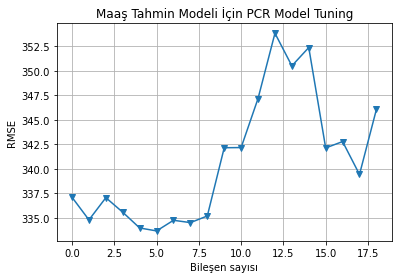

In [41]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning')
plt.grid();

In [42]:
min(RMSE) # optimum hata degeri [önemli]

333.6546715301251

In [43]:
print("Cross Validation uygulandıktan sonra elde edilen optimum hata degeri: ", min(RMSE))

Cross Validation uygulandıktan sonra elde edilen optimum hata degeri:  333.6546715301251


## SONUÇ

* Cok bilesenli ile elde edilen degerler: 
    * Hata degeri = **420.92935176696443**
    * Modelin basarı yüzdesi = 59.04682431073305
* Tek bilesenli ile elde edilen degerler: 
    * Hata degeri = **403.6654036966375**
    * Modelin basarı yüzdesi = 53.366904380827165
* Cross Validation uygulandıktan sonra elde edilen optimum hata degeri:  **333.6546715301251**

Bu uygulamada görüldüğü üzere cross validation uygulandıktan sonra optimum hata degeri elde edildi.